In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, binom
import pymc as pm

### 3.3.2
#### Binom distribution - Likelihood

[ 0  1  2  3  4  5  6  7  8  9 10]
[1.04857600e-04 1.57286400e-03 1.06168320e-02 4.24673280e-02
 1.11476736e-01 2.00658125e-01 2.50822656e-01 2.14990848e-01
 1.20932352e-01 4.03107840e-02 6.04661760e-03]
[6.04661760e-03 4.03107840e-02 1.20932352e-01 2.14990848e-01
 2.50822656e-01 2.00658125e-01 1.11476736e-01 4.24673280e-02
 1.06168320e-02 1.57286400e-03 1.04857600e-04]


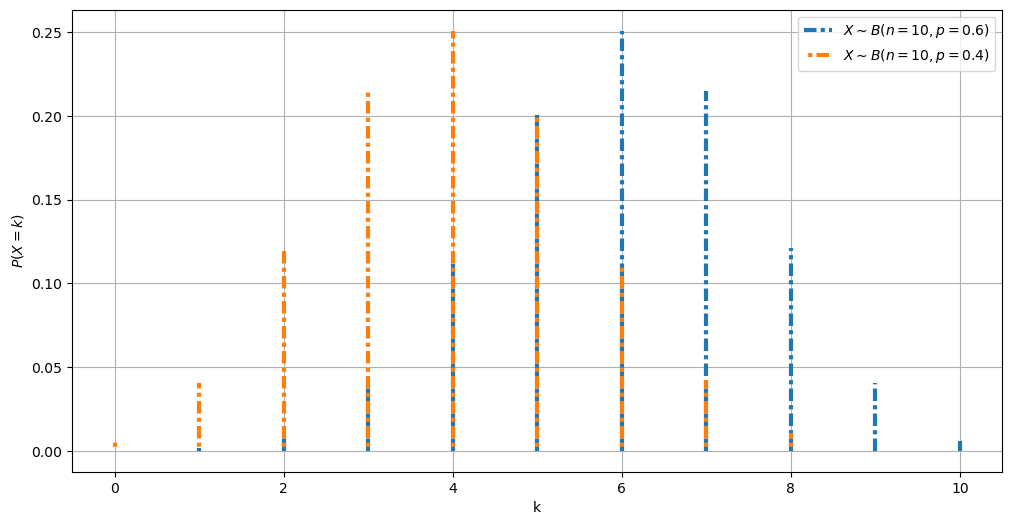

In [2]:
plt.figure(figsize=(12, 6))
x = np.arange(0, 11)
plt.vlines(
    x,
    np.zeros_like(x),
    binom.pmf(np.arange(0, 11), 10, 0.6),
    color="C0",
    label=r"$X \sim B(n=10, p=0.6)$",
    ls=(0, (3, 1, 1, 1)),
    lw=3
)
print(x)
print(binom.pmf(np.arange(0, 11), 10, 0.6))
print(binom.pmf(np.arange(0, 11), 10, 0.4))
plt.vlines(
    x,
    np.zeros_like(x),
    binom.pmf(np.arange(0, 11), 10, 0.4),
    color="C1",
    label=r"$X \sim B(n=10, p=0.4)$",
    ls=(3, (3, 1, 1, 1)),
    lw=3
)

plt.xlabel("k")
plt.ylabel(r"$P(X=k)$")
plt.grid()
plt.legend()

#### Beta distribution - prior

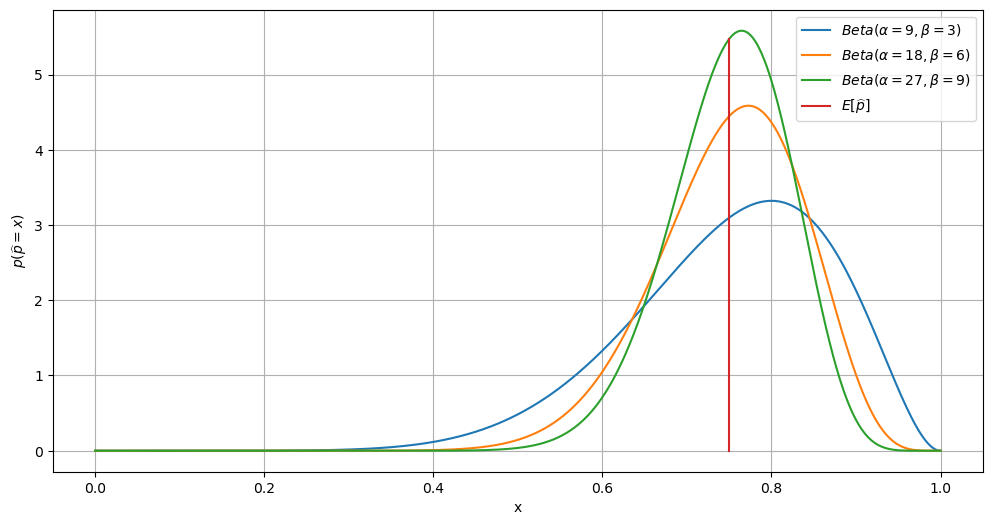

In [3]:
plt.figure(figsize=(12, 6))
# plt.subplot(100, 1, 1)
for b in [3, 6, 9]:
    a = 3 * b
    x = np.arange(0, 1.001, 0.001)
    y = beta.pdf(x, a, b)
    var = a*b/((a+b+1)*(a+b)^2)
    plt.plot(x, y, label=rf"$Beta(\alpha={a}, \beta={b})$")

plt.plot([a / (a + b), a / (a + b)], [0, beta.pdf(a / (a + b), a, b)], label=r"$E[\widehat{{p}}]$")

plt.xlabel("x")
plt.ylabel(r"$p(\widehat{p}=x)$")
plt.grid()
plt.legend()

#### Beta prior (9, 3) to beta posterior

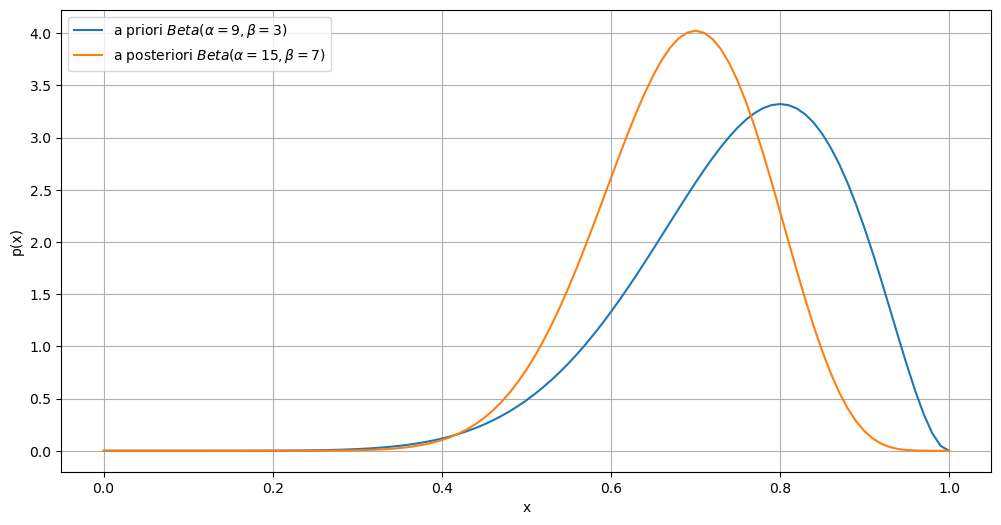

In [4]:
plt.figure(figsize=(12, 6))
a = 9
b = 3
x = np.arange(0, 1.01, 0.01)
y = beta.pdf(x, a, b)
plt.plot(x, y, color="C0", label=rf"a priori $Beta(\alpha={a}, \beta={b})$")

a += 6
b += 4
x = np.arange(0, 1.01, 0.01)
y = beta.pdf(x, a, b)
plt.plot(x, y, color="C1", label=rf"a posteriori $Beta(\alpha={a}, \beta={b})$")

plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid()
plt.legend()

#### Beta prior (1, 1) to posterior

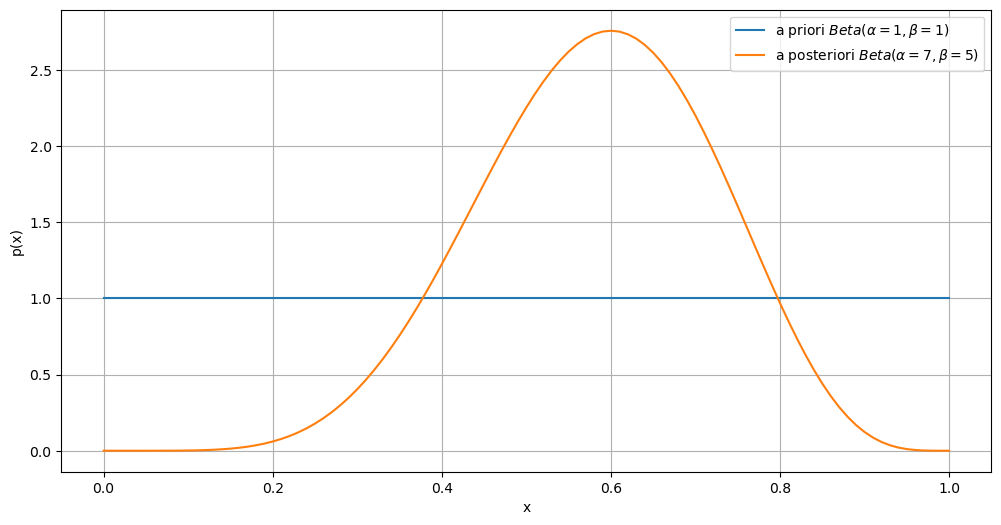

In [5]:
plt.figure(figsize=(12, 6))
a = 1
b = 1
x = np.arange(0, 1.01, 0.01)
y = beta.pdf(x, a, b)
plt.plot(x, y, color="C0", label=rf"a priori $Beta(\alpha={a}, \beta={b})$")

a += 6
b += 4
x = np.arange(0, 1.01, 0.01)
y = beta.pdf(x, a, b)
plt.plot(x, y, color="C1", label=rf"a posteriori $Beta(\alpha={a}, \beta={b})$")

plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid()
plt.legend()

#### Beta prior (27, 9) to posterior with large sample

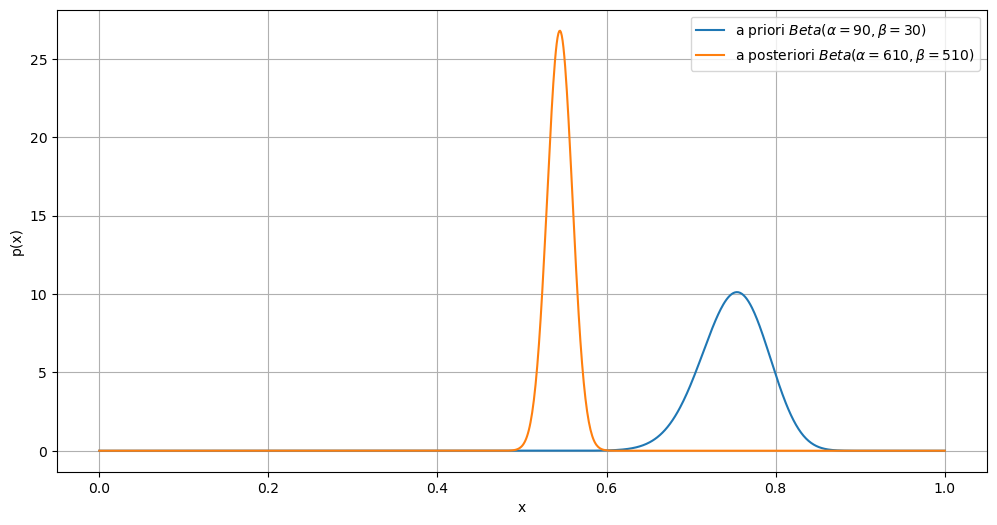

In [6]:
plt.figure(figsize=(12, 6))
a = 90
b = 30
x = np.arange(0, 1.001, 0.001)
y = beta.pdf(x, a, b)
plt.plot(x, y, color="C0", label=rf"a priori $Beta(\alpha={a}, \beta={b})$")

a += 520
b += 480
x = np.arange(0, 1.001, 0.001)
y = beta.pdf(x, a, b)
plt.plot(x, y, color="C1", label=rf"a posteriori $Beta(\alpha={a}, \beta={b})$")

plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid()
plt.legend()

### 3.3.3
#### Beta prior (9, 3) to beta posterior - MCMC and MAP

In [7]:
model = pm.Model()

data = np.array([1] * 6 + [0] * 4)
with model:
    p = pm.Beta("p", alpha=9, beta=3) # a priori
    X = pm.Bernoulli("x", p=p, observed=data) # likelihood
    # similar, using Binomial distribution
    # X = pm.Binomial("X", n=data.shape[0], p=p, observed=data.sum())

    # a posteriori estimates
    # MAP estimate
    point = pm.find_MAP()
    
    # MCMC trace
    trace = pm.sample()

Output()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


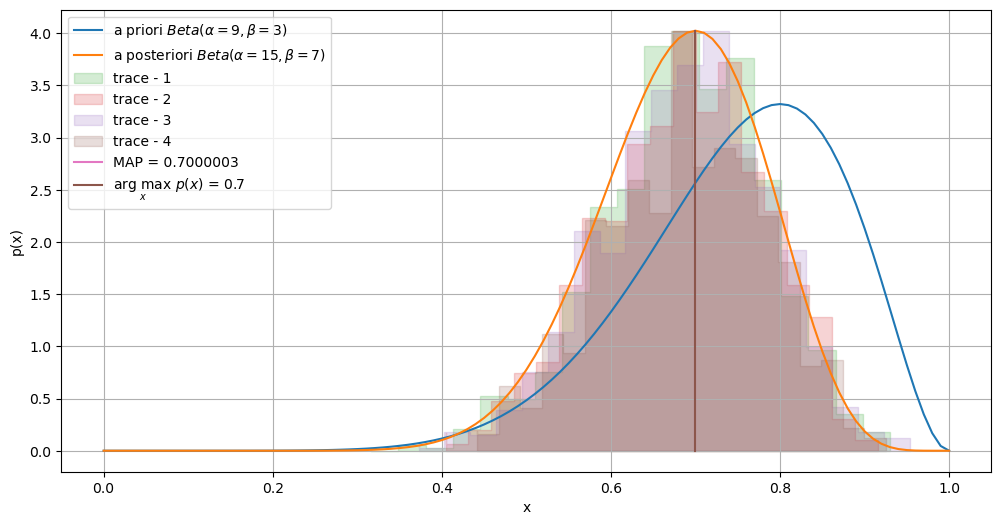

In [8]:
np_trace = trace["posterior"]["p"].to_numpy()
cnt_bins = 20

plt.figure(figsize=(12, 6))
a = 9
b = 3
x = np.arange(0, 1.01, 0.01)
y = beta.pdf(x, a, b)
plt.plot(x, y, color="C0", label=rf"a priori $Beta(\alpha={a}, \beta={b})$")

a += 6
b += 4
x = np.arange(0, 1.01, 0.01)
y = beta.pdf(x, a, b)
plt.plot(x, y, color="C1", label=rf"a posteriori $Beta(\alpha={a}, \beta={b})$")

for k in range(np_trace.shape[0]):
    counts, bins = np.histogram(np_trace[k], bins=cnt_bins)
    plt.fill_between(
        bins[1:],
        counts / counts.max() * y.max(),
        step="pre",
        alpha=0.2,
        color=f"C{2 + k}",
        label=f"trace - {k + 1}",
    )

plt.plot(
    [point["p"], point["p"]],
    [0, beta.pdf(point["p"], a, b)],
    label=f"MAP = {point["p"]:.7f}",
    color=f"C{2 + k + 1}",
)

mode = (a - 1) / (a + b - 2)
plt.plot(
    [mode, mode],
    [0, beta.pdf(mode, a, b)],
    label=fr"$\underset{{x}}{{\mathrm{{arg\text{{ }}max}}}}\text{{ }} p(x)$ = {mode}",
    color=f"C{2 + k}",
)

plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid()
plt.legend()
